## Data Mining Project(RFM Modelling, Outlier Detection, K-means Clustering, Classification)

### Importing Desired libraries

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('online_retail_II.xlsx' , header=0)

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# check datatype
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

## DATA PREPROCESSING

In [5]:
# dropna
df = df.dropna()

In [6]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


### Create a new feature TotalCost = Quantity x UnitPrice.

In [7]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["Price"]

In [8]:
# check new features
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost,TransactionDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


### Outlier removal in price feature

In [11]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df1=df.loc[(df['Price'] > fence_high)]
df2=df.loc[(df['Price'] < fence_low)]
df = df.loc[(df['Price'] > fence_low) & (df['Price'] < fence_high)]

In [12]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df1=df.loc[(df['Quantity'] > fence_high)]
df2=df.loc[(df['Quantity'] < fence_low)]
df = df.loc[(df['Quantity'] > fence_low) & (df['Quantity'] < fence_high)]

In [13]:
q1 = df['TotalCost'].quantile(0.25)
q3 = df['TotalCost'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df1=df.loc[(df['TotalCost'] > fence_high)]
df2=df.loc[(df['TotalCost'] < fence_low)]
df = df.loc[(df['TotalCost'] > fence_low) & (df['TotalCost'] < fence_high)]

In [14]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost,TransactionDate
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009-12-01
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009-12-01
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010-12-09
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12-09
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12-09
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010-12-09


### We will create a target feature to make this problem supervized

In [15]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["Invoice"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [16]:
# apply target
df["cancelled"] = cancel

In [17]:
df['cancelled'].value_counts()

0    333594
1      5702
Name: cancelled, dtype: int64

In [18]:
# create copy for rfm modeling
df1 = df.copy()

### RFM Model Building

First, we make RFM table that contains Recency, Frequency, and Monetary group by CustomerID

### RECENCY

In [19]:
now = pd.to_datetime(df['TransactionDate'].max())

In [20]:
#get cust last trans date
recency = df.groupby(by='Customer ID', as_index=False)['TransactionDate'].max()
recency.columns = ['Customer ID','TransactionDate']

In [21]:
#calculate recency
recency['TransactionDate'] = pd.to_datetime(recency['TransactionDate'])
recency['recency'] = recency['TransactionDate'].apply(lambda x: (now - x).days)

In [22]:
recency.head()

,Customer ID,TransactionDate,recency
0,12346.0,2010-10-04,66
1,12347.0,2010-12-07,2
2,12348.0,2010-09-27,73
3,12349.0,2010-10-28,42
4,12351.0,2010-11-29,10


### FREQUENCY

In [23]:
frequency = pd.DataFrame()
frequency['Customer ID'] = [i for i in df['Customer ID'].unique()]
frequency['frequency'] = df.groupby('Customer ID')['Customer ID'].transform('count')

frequency["frequency"] = df.groupby('Customer ID', as_index=False)["Customer ID"].count()

In [24]:
frequency.head()

,Customer ID,frequency
0,13085.0,37
1,13078.0,65
2,15362.0,20
3,12682.0,79
4,18087.0,20


### MONETARY

In [25]:
monetary = df.groupby(by='Customer ID', as_index=False).agg({'TotalCost' : 'sum'})
monetary.columns = ['Customer ID','monetary']

In [26]:
monetary.head()

,Customer ID,monetary
0,12346.0,311.37
1,12347.0,1058.57
2,12348.0,222.16
3,12349.0,1321.09
4,12351.0,288.18


In [27]:
# create rfm table
rf = pd.merge(recency, frequency, on = "Customer ID")
rfm_df = pd.merge(rf, monetary, on = "Customer ID")

In [28]:
rfm_df

,Customer ID,TransactionDate,recency,frequency,monetary
0,12346.0,2010-10-04,66,73,311.37
1,12347.0,2010-12-07,2,29,1058.57
2,12348.0,2010-09-27,73,262,222.16
3,12349.0,2010-10-28,42,148,1321.09
4,12351.0,2010-11-29,10,19,288.18
...,...,...,...,...,...
4114,18283.0,2010-11-22,17,88,531.02
4115,18284.0,2010-10-04,66,55,286.88
4116,18285.0,2010-02-17,295,28,93.20
4117,18286.0,2010-08-20,111,2,943.57


In [29]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,Customer ID,TransactionDate,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2010-10-04,66,73,311.37,41.565303,69.774217,69.774217
1,12347.0,2010-12-07,2,29,1058.57,95.847156,41.563486,41.563486
2,12348.0,2010-09-27,73,262,222.16,38.039071,94.343287,94.343287
3,12349.0,2010-10-28,42,148,1321.09,56.173977,85.931051,85.931051
4,12351.0,2010-11-29,10,19,288.18,85.108736,29.922311,29.922311


In [30]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Customer ID', 'RFM_Score']].head(7)

,Customer ID,RFM_Score
0,12346.0,3.28
1,12347.0,2.49
2,12348.0,4.29
3,12349.0,4.07
4,12351.0,1.91
5,12352.0,2.18
6,12353.0,1.37


In [31]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Customer ID', 'RFM_Score', 'Customer_segment']].head(20)

,Customer ID,RFM_Score,Customer_segment
0,12346.0,3.28,Medium Value Customer
1,12347.0,2.49,Low Value Customers
2,12348.0,4.29,High value Customer
3,12349.0,4.07,High value Customer
4,12351.0,1.91,Low Value Customers
5,12352.0,2.18,Low Value Customers
6,12353.0,1.37,Lost Customers
7,12355.0,0.16,Lost Customers
8,12356.0,2.61,Low Value Customers
9,12357.0,3.61,Medium Value Customer


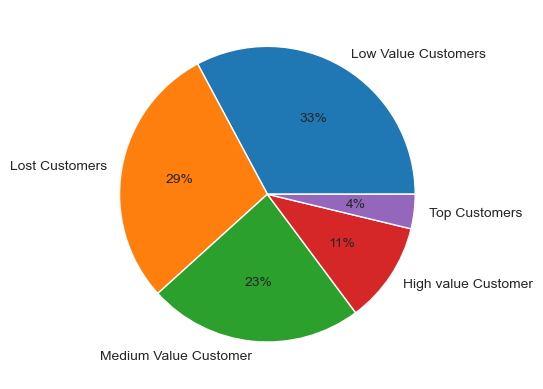

In [32]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

### Summary:

After calculating the number and visualizing the segments of the rfm score, we get:

The number of 'Other' segments is still around 40%, this can still be done by segmentation to get further segment insights.
The highest number after that is in the 'Big Spender' and 'Loyal Customers' segments, meaning that the number of healthy customers is still high with a total percentage of 50%. Special campaign programs can be made to increase the number of customers in this category.
The number of 'Best Customer' is still around 4.9%. It is better to do a loyalty program, in order to protect this customer.
If we consider 'Lost Cheap Customers', 'Lost Customers', and 'Almost Lost' are churn customers, then the number of churned customers is around 4.4% of the total customers, where this is still reasonable. If necessary, retargeting of these customers can be carried out.

### Clustering

In [33]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

# Library untuk clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Library untuk DB Index untuk mengukur hasil clustering
from sklearn.metrics import davies_bouldin_score

In [34]:
X = np.asarray(rfm_df[["recency", "monetary"]])

In [35]:
X

array([[  66.  ,  311.37],
       [   2.  , 1058.57],
       [  73.  ,  222.16],
       ...,
       [ 295.  ,   93.2 ],
       [ 111.  ,  943.57],
       [  17.  , 1161.94]])

### K means

In [36]:
# range k dari Kmeans
k = range(1, 10)
inertia = [] 
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X)
    inertia.append(model.inertia_)

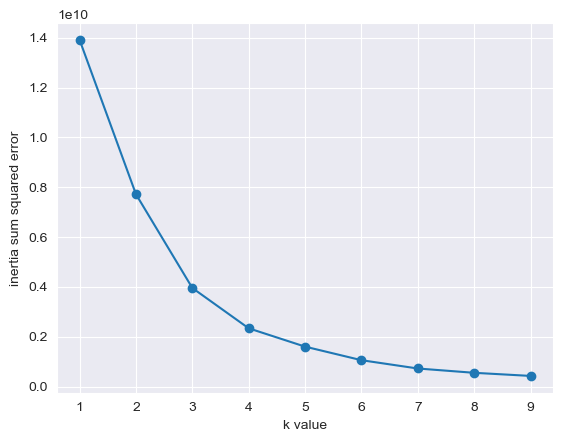

In [37]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [38]:
X

array([[  66.  ,  311.37],
       [   2.  , 1058.57],
       [  73.  ,  222.16],
       ...,
       [ 295.  ,   93.2 ],
       [ 111.  ,  943.57],
       [  17.  , 1161.94]])

In [39]:
model_km = KMeans(n_clusters=4, max_iter=1000, random_state=0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [40]:
rfm_df['cluster_km'] = model_km.predict(X)

In [41]:
rfm_df['cluster_km'].value_counts()

3    3543
0     540
2      34
1       2
Name: cluster_km, dtype: int64

In [42]:
rfm_df

,Customer ID,TransactionDate,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,cluster_km
0,12346.0,2010-10-04,66,73,311.37,41.57,69.77,69.77,3.28,Medium Value Customer,3
1,12347.0,2010-12-07,2,29,1058.57,95.85,41.56,41.56,2.49,Low Value Customers,3
2,12348.0,2010-09-27,73,262,222.16,38.04,94.34,94.34,4.29,High value Customer,3
3,12349.0,2010-10-28,42,148,1321.09,56.17,85.93,85.93,4.07,High value Customer,3
4,12351.0,2010-11-29,10,19,288.18,85.11,29.92,29.92,1.91,Low Value Customers,3
...,...,...,...,...,...,...,...,...,...,...,...
4114,18283.0,2010-11-22,17,88,531.02,75.92,74.88,74.88,3.75,Medium Value Customer,3
4115,18284.0,2010-10-04,66,55,286.88,41.57,61.53,61.53,2.93,Low Value Customers,3
4116,18285.0,2010-02-17,295,28,93.20,5.95,40.64,40.64,1.77,Low Value Customers,3
4117,18286.0,2010-08-20,111,2,943.57,29.24,2.51,2.51,0.33,Lost Customers,3


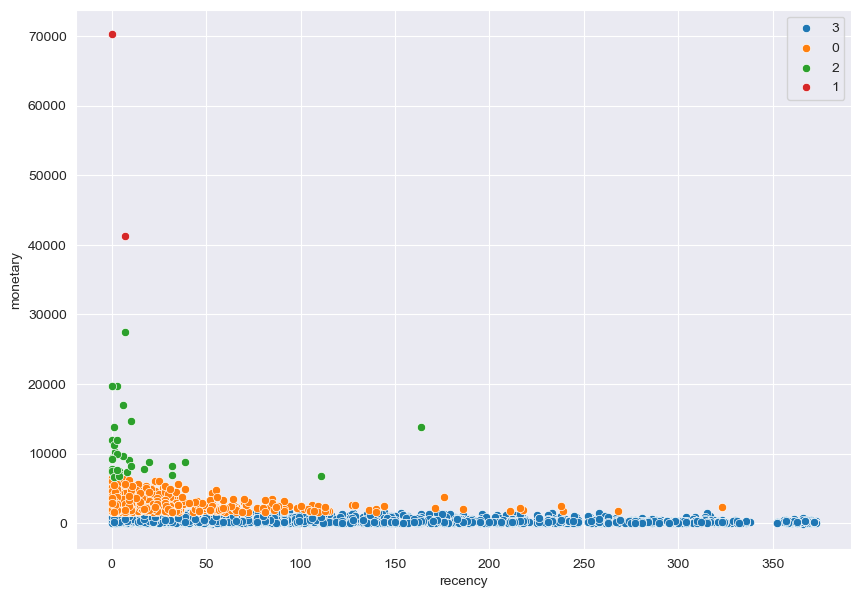

<Figure size 1500x1500 with 0 Axes>

In [43]:
plt.figure(figsize=(10,7))
for i in rfm_df['cluster_km'].unique():
    sns.scatterplot(rfm_df['recency'][rfm_df['cluster_km']==i],rfm_df['monetary'][rfm_df['cluster_km']==i], label=i)
plt.legend()
plt.figure(figsize=(15,15))
plt.show()

Cluster 0 is a group of customers who have low monetary and diverse recencies

Cluster 1 is a group of customers who have a high monetary range of > 170000 Pounds and relative recency < 10 days

Cluster 2 is a group of customers who have monetary 50000 to 130000 Pounds and recency < 50 days

Cluster 3 is a group of customers who have monetary < 50,000 Pounds and most recency < 250 days

## Supervized Learning

In [44]:
dfr = pd.merge(df1, rfm_df, on = 'Customer ID')

In [45]:
dfr

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost,TransactionDate_x,...,TransactionDate_y,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,cluster_km
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,...,2010-01-29,314,37,884.20,4.2,49.24,49.24,2.12,Low Value Customers,3
1,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,...,2010-01-29,314,37,884.20,4.2,49.24,49.24,2.12,Low Value Customers,3
2,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009-12-01,...,2010-01-29,314,37,884.20,4.2,49.24,49.24,2.12,Low Value Customers,3
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009-12-01,...,2010-01-29,314,37,884.20,4.2,49.24,49.24,2.12,Low Value Customers,3
4,490068,22350,CAT BOWL,12,2009-12-03 14:06:00,2.55,13085.0,United Kingdom,30.60,2009-12-03,...,2010-01-29,314,37,884.20,4.2,49.24,49.24,2.12,Low Value Customers,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339291,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,2010-12-09,...,2010-12-09,0,66,292.97,100.0,67.19,67.19,3.61,Medium Value Customer,3
339292,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,2010-12-09,...,2010-12-09,0,66,292.97,100.0,67.19,67.19,3.61,Medium Value Customer,3
339293,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,2010-12-09,...,2010-12-09,0,66,292.97,100.0,67.19,67.19,3.61,Medium Value Customer,3
339294,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,2010-12-09,...,2010-12-09,0,66,292.97,100.0,67.19,67.19,3.61,Medium Value Customer,3


In [46]:
dfr1 = dfr[['Quantity','TotalCost','recency','frequency','monetary','cluster_km','cancelled']]

In [47]:
dfr1

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,cancelled
0,24,30.00,314,37,884.20,3,0
1,24,30.00,314,37,884.20,3,0
2,12,30.60,314,37,884.20,3,0
3,12,30.60,314,37,884.20,3,0
4,12,30.60,314,37,884.20,3,0
...,...,...,...,...,...,...,...
339291,12,35.40,0,66,292.97,3,0
339292,6,15.30,0,66,292.97,3,0
339293,6,17.70,0,66,292.97,3,0
339294,12,19.80,0,66,292.97,3,0


### Train Test Split

In [48]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
X = dfr1.drop(columns='cancelled')
y = dfr1['cancelled']

In [50]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0) #size test 20%

In [51]:
model = LogisticRegression() #call model
model.fit(X_train,y_train) #fit model train

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
result = pd.DataFrame()
result['y_act'] = y_test
result['y_pred'] = y_pred

In [54]:
result = pd.concat([X_test,result],axis=1)

In [55]:
print(confusion_matrix(y_test,y_pred))

[[66751     0]
 [    0  1109]]


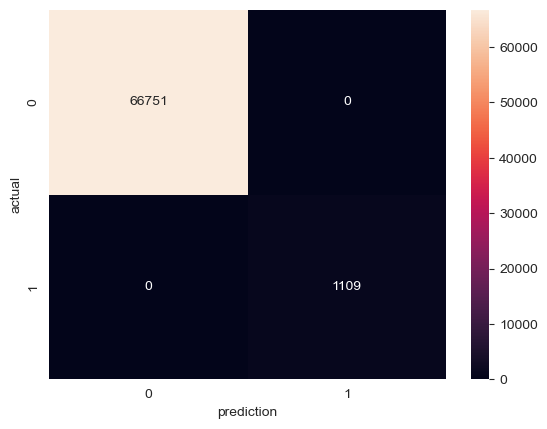

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [57]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66751
           1       1.00      1.00      1.00      1109

    accuracy                           1.00     67860
   macro avg       1.00      1.00      1.00     67860
weighted avg       1.00      1.00      1.00     67860



This is an overfitted model

### OPTIMIZATION AND VALIDATION

In [58]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [59]:
cv = KFold(n_splits=5, shuffle=False)

In [60]:
scores_train = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)

In [61]:
for i,j in enumerate(scores_train):
    print(f'fold no. - {i}, score {round(j, 2)}')

fold no. - 0, score 1.0
fold no. - 1, score 1.0
fold no. - 2, score 1.0
fold no. - 3, score 1.0
fold no. - 4, score 1.0


In [62]:
scores_test = cross_validate(model, X_train, y_train, cv=5)

In [63]:
for i,j in enumerate(scores_test['test_score']):
    print(f'fold no. - {i}, score {round(j, 2)}')

fold no. - 0, score 1.0
fold no. - 1, score 1.0
fold no. - 2, score 1.0
fold no. - 3, score 1.0
fold no. - 4, score 1.0


## EXPLORATORY DATA ANALYSIS

In [64]:
dfr.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalCost,TransactionDate_x,...,TransactionDate_y,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,cluster_km
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,...,2010-01-29,314,37,884.2,4.2,49.24,49.24,2.12,Low Value Customers,3
1,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,...,2010-01-29,314,37,884.2,4.2,49.24,49.24,2.12,Low Value Customers,3
2,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009-12-01,...,2010-01-29,314,37,884.2,4.2,49.24,49.24,2.12,Low Value Customers,3
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009-12-01,...,2010-01-29,314,37,884.2,4.2,49.24,49.24,2.12,Low Value Customers,3
4,490068,22350,CAT BOWL,12,2009-12-03 14:06:00,2.55,13085.0,United Kingdom,30.6,2009-12-03,...,2010-01-29,314,37,884.2,4.2,49.24,49.24,2.12,Low Value Customers,3


### Sales Trend

In [65]:
c0 = dfr[(dfr['cluster_km'] == 0)]
c1 = dfr[(dfr['cluster_km'] == 1)]
c2 = dfr[(dfr['cluster_km'] == 2)]
c3 = dfr[(dfr['cluster_km'] == 3)]

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

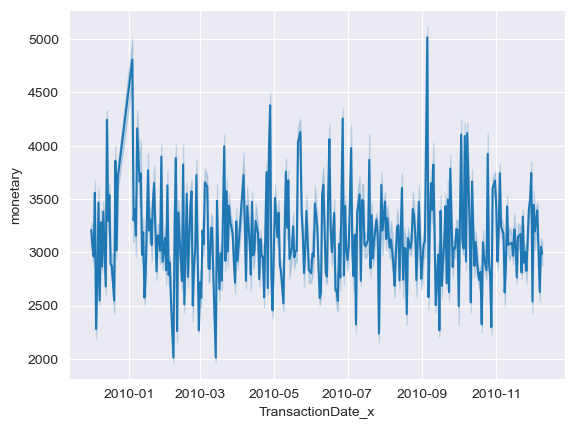

In [66]:
sns.lineplot(data = c0, x = 'TransactionDate_x', y = 'monetary')

For c0 (Cluster 0) it tends to have the lowest monetary value at 1900 Pounds. For the highest monetary found in January 2010 ranging from 5000 pounds.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

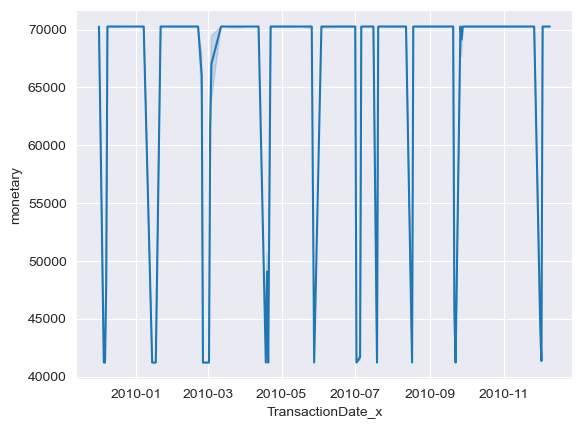

In [67]:
sns.lineplot(data = c1, x = 'TransactionDate_x', y = 'monetary')

For c1 (Cluster 1) has the highest monetary reach 340000 Pounds. Monetary on c1 tends to be evenly distributed, it can be concluded that customers on c1 shop regularly.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

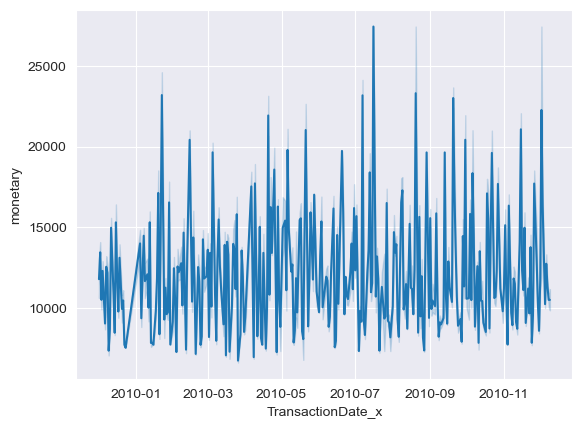

In [68]:
sns.lineplot(data = c2, x = 'TransactionDate_x', y = 'monetary')

For c2 (Cluster 2) it has a fairly high monetary range above 180,000 Pounds. Monetary on c2 is almost the same as c1.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

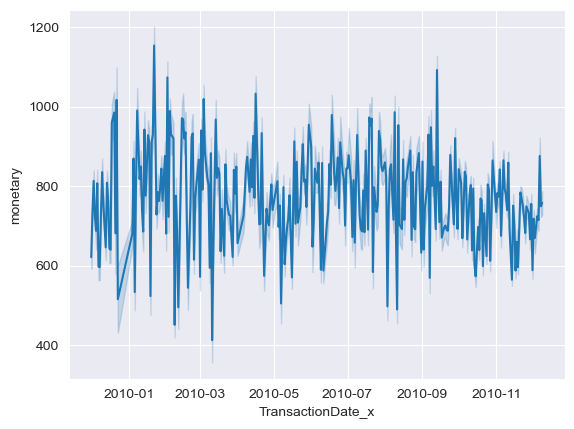

In [69]:
sns.lineplot(data = c3, x = 'TransactionDate_x', y = 'monetary')

For c3 (Cluster 3) it has a fairly low monetary compared to c2 ranging from 10000-40000 Pounds.

## MOST SOLD AND CANCELLED PRODUCT

In [70]:
c0.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
2147,PACK OF 72 RETRO SPOT CAKE CASES,7586
122,60 TEATIME FAIRY CAKE CASES,6480
3479,WHITE HANGING HEART T-LIGHT HOLDER,5626
3234,STRAWBERRY CERAMIC TRINKET BOX,5291
2145,PACK OF 60 PINK PAISLEY CAKE CASES,5147


In [71]:
c1.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
1541,WOODEN FRAME ANTIQUE WHITE,972
1544,WOODEN PICTURE FRAME WHITE FINISH,912
1513,WHITE HANGING HEART T-LIGHT HOLDER,716
46,60 TEATIME FAIRY CAKE CASES,600
1383,"SPRING DEC , HANGING CHICK CREAM",552


In [72]:
c2.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
424,BOX OF 24 COCKTAIL PARASOLS,1515
2662,STRAWBERRY CERAMIC TRINKET BOX,1372
1537,LUNCH BAG WOODLAND,1340
1534,LUNCH BAG RED SPOTTY,1316
1760,PACK OF 72 RETRO SPOT CAKE CASES,1283


In [73]:
c3.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
2245,PACK OF 72 RETRO SPOT CAKE CASES,7590
119,60 TEATIME FAIRY CAKE CASES,6786
3638,WHITE HANGING HEART T-LIGHT HOLDER,6475
2243,PACK OF 60 PINK PAISLEY CAKE CASES,5613
221,ASSORTED COLOUR BIRD ORNAMENT,5184
